# Lab Activity Week 6

**Homework** Anythin you do not complete in lab is your homework. Please provide a link to your github repository as your homework submission.

### Step 1: Aquiring data

- Collect data from your weather and air quality sensors together (in the same script) for 5 minutes, taking a reading every second. 
- Make the name of the file saving the data something that is unique each time data is recorded. 
   - **HINT:** You can include the time as part of the file name, for example.
- Upload your new data to your git repository on GitHub and update the version of your respository on your laptop

### Step 2: Acquiring outdoor data
- Restart your raspberry pi system, powering it with the supplied batteries, rather than the power adaptor.
- Add a time delay to the start of your data acquisition script (as an optional user input)
- Start your data aquisition to again collect data for 5 minutes, taking readings every second, but this time with an initial ~2 minute delay (so it should run for ~7 minutes total).
- Take the whole system outdoors and wait there for the 5 minutes of data acquisition to complete.
- At your stations, again push your new data to your git repository on GitHub

### Step 3: Plotting indoor data
- Create a new Jupyter notebook and load (using pandas, for example) the data you now have from your device.
- Plot each type of data as a frequency distribution (histogram) with appropriate binning - meaning the distribution shows a good level of detail but does not have binning artifacts
- Using the mean and standard deviation of each set of data, does any of the data you have recorded look like it is well described by a normal distribution?
  - Using the mean and standard deviation, try plotting a Gaussian function along with each of your frequency distributions and see how well they match.

In [63]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from numpy import random
import math

in_data = pd.read_csv('indoor250.csv')
display(in_data)

a = 'PM10 std'
b = 'PM25 std'
c = 'PM 100 std'
d = 'Temperature'
e = 'Gas'
f = 'Pressure'
g = 'Altitude'
h = 'Relative Humidity'

ibins = [3,5,5,12,10,10,10,12]

def gauss(x, m, s):
    return 1/(math.sqrt(2.*math.pi*s**2))*math.e**((-1*(x-m)**2)/(2. * s**2))

,Time,PM10 std,PM25 std,PM 100 std,Temperature,Gas,Pressure,Altitude,Relative Humidity
0,1677106265,1,2,3,22.584883,7410,997.338470,133.324648,22.152560
1,1677106266,1,2,3,22.646406,9116,997.329947,133.396519,22.135800
2,1677106267,1,2,3,22.703047,10390,997.330081,133.395388,22.092843
3,1677106268,1,2,3,22.743672,11346,997.328261,133.410741,22.038517
4,1677106268,1,2,3,22.788984,12099,997.331082,133.386946,22.005199
...,...,...,...,...,...,...,...,...,...
343,1677106562,1,2,3,23.232344,55588,997.377918,132.991984,21.002069
344,1677106562,1,2,3,23.236641,55551,997.373344,133.030552,20.992062
345,1677106563,1,2,3,23.226680,55772,997.359630,133.146200,20.981178
346,1677106564,1,2,3,23.228047,55847,997.360273,133.140783,20.965857


<function matplotlib.pyplot.show(close=None, block=None)>

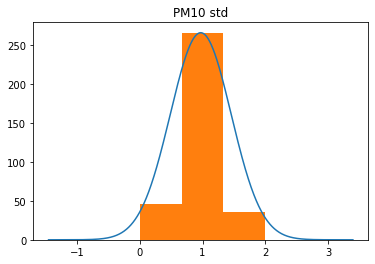

In [4]:
#PM10 std

ndata = in_data[a]  ##VAR
bns = 3  ##VAR

i = 0
xd = np.zeros(bns)
mx = ndata.max()
mn = ndata.min()
step = (ndata.max() - ndata.min())/bns

for i in range(bns):
    cstep = mn + (step * i)
    imask = (ndata >= cstep) & (ndata <= (cstep + step))
    idata = ndata[imask]
    xd[i] = len(idata)

mu = np.mean(in_data[a])  ##VAR
sig = np.std(in_data[a])  ##VAR
xdata = np.linspace(mu-5*sig,mu+5*sig,1000)

ln = xd.max()/gauss(xdata, mu, sig).max()

plt.title(a)  ##VAR
plt.plot(xdata,ln*gauss(xdata, mu, sig))
plt.hist(in_data[a],bins=bns)  ##VAR
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

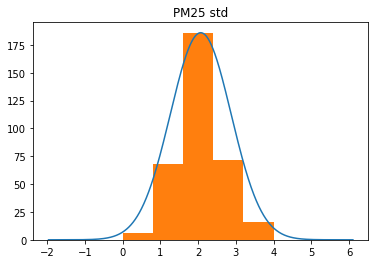

In [5]:
#PM25 std

ndata = in_data[b]  ##VAR
bns = 5  ##VAR

i = 0
xd = np.zeros(bns)
mx = ndata.max()
mn = ndata.min()
step = (ndata.max() - ndata.min())/bns

for i in range(bns):
    cstep = mn + (step * i)
    imask = (ndata >= cstep) & (ndata <= (cstep + step))
    idata = ndata[imask]
    xd[i] = len(idata)

mu = np.mean(in_data[b])  ##VAR
sig = np.std(in_data[b])  ##VAR
xdata = np.linspace(mu-5*sig,mu+5*sig,1000)

ln = xd.max()/gauss(xdata, mu, sig).max()

plt.title(b)  ##VAR
plt.plot(xdata,ln*gauss(xdata, mu, sig))
plt.hist(in_data[b],bins=bns)  ##VAR
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

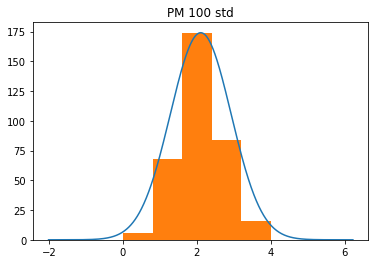

In [6]:
#PM100 std

ndata = in_data[c]  ##VAR
bns = 5  ##VAR

i = 0
xd = np.zeros(bns)
mx = ndata.max()
mn = ndata.min()
step = (ndata.max() - ndata.min())/bns

for i in range(bns):
    cstep = mn + (step * i)
    imask = (ndata >= cstep) & (ndata <= (cstep + step))
    idata = ndata[imask]
    xd[i] = len(idata)

mu = np.mean(in_data[c])  ##VAR
sig = np.std(in_data[c])  ##VAR
xdata = np.linspace(mu-5*sig,mu+5*sig,1000)

ln = xd.max()/gauss(xdata, mu, sig).max()

plt.title(c)  ##VAR
plt.plot(xdata,ln*gauss(xdata, mu, sig))
plt.hist(in_data[c],bins=bns)  ##VAR
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

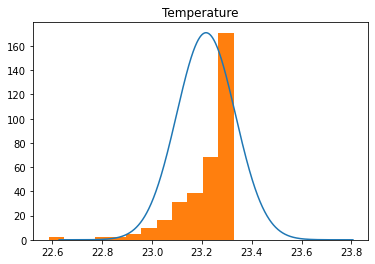

In [7]:
#Temperature

ndata = in_data[d]  ##VAR
bns = 12  ##VAR

i = 0
xd = np.zeros(bns)
mx = ndata.max()
mn = ndata.min()
step = (ndata.max() - ndata.min())/bns

for i in range(bns):
    cstep = mn + (step * i)
    imask = (ndata >= cstep) & (ndata <= (cstep + step))
    idata = ndata[imask]
    xd[i] = len(idata)

mu = np.mean(in_data[d])  ##VAR
sig = np.std(in_data[d])  ##VAR
xdata = np.linspace(mu-5*sig,mu+5*sig,1000)

ln = xd.max()/gauss(xdata, mu, sig).max()

plt.title(d)  ##VAR
plt.plot(xdata,ln*gauss(xdata, mu, sig))
plt.hist(in_data[d],bins=bns)  ##VAR
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

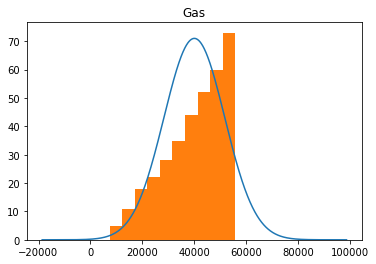

In [8]:
#Gas

ndata = in_data[e]  ##VAR
bns = 10  ##VAR

i = 0
xd = np.zeros(bns)
mx = ndata.max()
mn = ndata.min()
step = (ndata.max() - ndata.min())/bns

for i in range(bns):
    cstep = mn + (step * i)
    imask = (ndata >= cstep) & (ndata <= (cstep + step))
    idata = ndata[imask]
    xd[i] = len(idata)

mu = np.mean(in_data[e])  ##VAR
sig = np.std(in_data[e])  ##VAR
xdata = np.linspace(mu-5*sig,mu+5*sig,1000)

ln = xd.max()/gauss(xdata, mu, sig).max()

plt.title(e)  ##VAR
plt.plot(xdata,ln*gauss(xdata, mu, sig))
plt.hist(in_data[e],bins=bns)  ##VAR
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

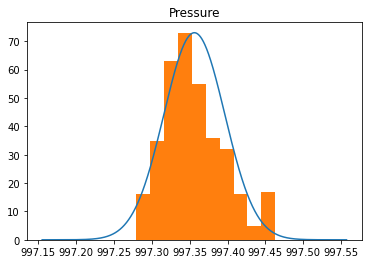

In [9]:
#Pressure

ndata = in_data[f]  ##VAR
bns = 10  ##VAR

i = 0
xd = np.zeros(bns)
mx = ndata.max()
mn = ndata.min()
step = (ndata.max() - ndata.min())/bns

for i in range(bns):
    cstep = mn + (step * i)
    imask = (ndata >= cstep) & (ndata <= (cstep + step))
    idata = ndata[imask]
    xd[i] = len(idata)

mu = np.mean(in_data[f])  ##VAR
sig = np.std(in_data[f])  ##VAR
xdata = np.linspace(mu-5*sig,mu+5*sig,1000)

ln = xd.max()/gauss(xdata, mu, sig).max()

plt.title(f)  ##VAR
plt.plot(xdata,ln*gauss(xdata, mu, sig))
plt.hist(in_data[f],bins=bns)  ##VAR
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

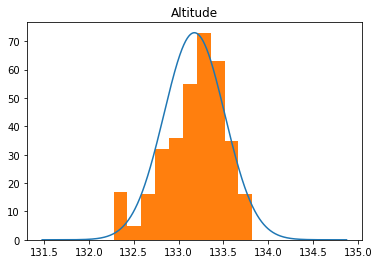

In [10]:
#Altitude

ndata = in_data[g]  ##VAR
bns = 10  ##VAR

i = 0
xd = np.zeros(bns)
mx = ndata.max()
mn = ndata.min()
step = (ndata.max() - ndata.min())/bns

for i in range(bns):
    cstep = mn + (step * i)
    imask = (ndata >= cstep) & (ndata <= (cstep + step))
    idata = ndata[imask]
    xd[i] = len(idata)

mu = np.mean(in_data[g])  ##VAR
sig = np.std(in_data[g])  ##VAR
xdata = np.linspace(mu-5*sig,mu+5*sig,1000)

ln = xd.max()/gauss(xdata, mu, sig).max()

plt.title(g)  ##VAR
plt.plot(xdata,ln*gauss(xdata, mu, sig))
plt.hist(in_data[g],bins=bns)  ##VAR
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

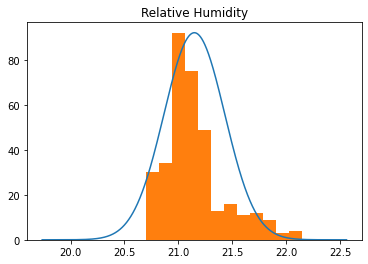

In [11]:
#Relative Humidity

ndata = in_data[h]  ##VAR
bns = 12  ##VAR

i = 0
xd = np.zeros(bns)
mx = ndata.max()
mn = ndata.min()
step = (ndata.max() - ndata.min())/bns

for i in range(bns):
    cstep = mn + (step * i)
    imask = (ndata >= cstep) & (ndata <= (cstep + step))
    idata = ndata[imask]
    xd[i] = len(idata)

mu = np.mean(in_data[h])  ##VAR
sig = np.std(in_data[h])  ##VAR
xdata = np.linspace(mu-5*sig,mu+5*sig,1000)

ln = xd.max()/gauss(xdata, mu, sig).max()

plt.title(h)  ##VAR
plt.plot(xdata,ln*gauss(xdata, mu, sig))
plt.hist(in_data[h],bins=bns)  ##VAR
plt.show

### Step 4: Comparing Indoor vs Outdoor data
- Produce the same plots as in Step 2 for your new outdoor data
- Now produce plots that compare indoors vs outdoors for each of your data types - don't forget labels
- Comment on your results
- Compare the mean and standard deviation values for each set of indoor data versus outdoor data, are they in agreement?
  - NOTE: The variance in your data is not the uncertainty on the mean (central limit theorem)
  - what is your mean uncertainty?
  - How many inside mean standard deviations (1 sigma uncertainty) are your inside and outside measurements separated by?
- If your distributions were not well described by a Gaussian, do you think you took enough data for the central limit theorem to apply?

In [12]:
## STEP 4

ou_data = pd.read_csv('outdoor310.csv')
display(ou_data)

obins = [3,4,5,5,4,10,10,6]

,Time,PM10 std,PM25 std,PM 100 std,Temperature,Gas,Pressure,Altitude,Relative Humidity
0,1677107493,1,3,4,16.375508,138832,996.743927,138.339680,27.336550
1,1677107493,1,3,4,16.375508,138832,996.743927,138.339680,27.336550
2,1677107493,1,2,3,16.375508,138832,996.743927,138.339680,27.336550
3,1677107493,1,2,3,16.375508,138832,996.743927,138.339680,27.336550
4,1677107493,2,3,4,16.375508,138832,996.743927,138.339680,27.336550
...,...,...,...,...,...,...,...,...,...
516,1677107789,0,1,1,12.400508,77963,996.815218,137.738208,32.117167
517,1677107790,0,1,1,12.370234,77675,996.843282,137.501443,32.153170
518,1677107791,0,1,1,12.332734,77746,996.868866,137.285605,32.128214
519,1677107792,0,1,1,12.301680,77890,996.892198,137.088767,32.164155


<function matplotlib.pyplot.show(close=None, block=None)>

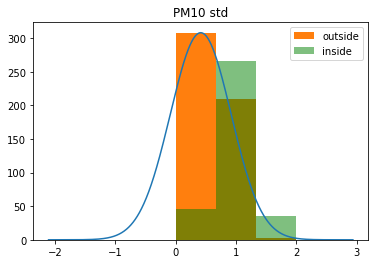

In [13]:
#PM10 (outside vs inside)

ndata = ou_data[a]  ##VAR
bns = 3  ##VAR

i = 0
xd = np.zeros(bns)
mx = ndata.max()
mn = ndata.min()
step = (ndata.max() - ndata.min())/bns

for i in range(bns):
    cstep = mn + (step * i)
    imask = (ndata >= cstep) & (ndata <= (cstep + step))
    idata = ndata[imask]
    xd[i] = len(idata)

mu = np.mean(ou_data[a])  ##VAR
sig = np.std(ou_data[a])  ##VAR
xdata = np.linspace(mu-5*sig,mu+5*sig,1000)

ln = xd.max()/gauss(xdata, mu, sig).max()

plt.title(a)  ##VAR
plt.plot(xdata,ln*gauss(xdata, mu, sig))
plt.hist(ou_data[a],bins=bns,label='outside')  ##VAR
plt.hist(in_data[a],bins=ibins[0],color="green",label='inside',alpha=0.5)
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

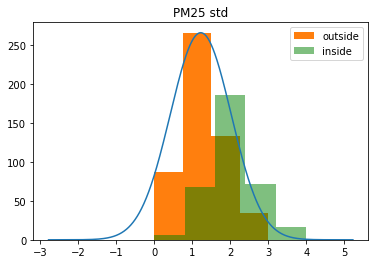

In [14]:
#PM25 (outside vs inside)

ndata = ou_data[b]  ##VAR
bns = 4  ##VAR

i = 0
xd = np.zeros(bns)
mx = ndata.max()
mn = ndata.min()
step = (ndata.max() - ndata.min())/bns

for i in range(bns):
    cstep = mn + (step * i)
    imask = (ndata >= cstep) & (ndata <= (cstep + step))
    idata = ndata[imask]
    xd[i] = len(idata)

mu = np.mean(ou_data[b])  ##VAR
sig = np.std(ou_data[b])  ##VAR
xdata = np.linspace(mu-5*sig,mu+5*sig,1000)

ln = xd.max()/gauss(xdata, mu, sig).max()

plt.title(b)  ##VAR
plt.plot(xdata,ln*gauss(xdata, mu, sig))
plt.hist(ou_data[b],bins=bns,label='outside')  ##VAR
plt.hist(in_data[b],bins=ibins[1],color="green",label='inside',alpha=0.5)
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

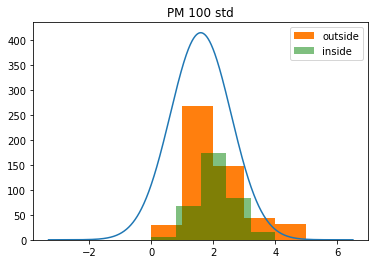

In [15]:
#PM100 (outside)

ndata = ou_data[c]  ##VAR
bns = 5  ##VAR

i = 0
xd = np.zeros(bns)
mx = ndata.max()
mn = ndata.min()
step = (ndata.max() - ndata.min())/bns

for i in range(bns):
    cstep = mn + (step * i)
    imask = (ndata >= cstep) & (ndata <= (cstep + step))
    idata = ndata[imask]
    xd[i] = len(idata)

mu = np.mean(ou_data[c])  ##VAR
sig = np.std(ou_data[c])  ##VAR
xdata = np.linspace(mu-5*sig,mu+5*sig,1000)

ln = xd.max()/gauss(xdata, mu, sig).max()

plt.title(c)  ##VAR
plt.plot(xdata,ln*gauss(xdata, mu, sig))
plt.hist(ou_data[c],bins=bns,label='outside')  ##VAR
plt.hist(in_data[c],bins=ibins[2],color="green",label='inside',alpha=0.5)
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

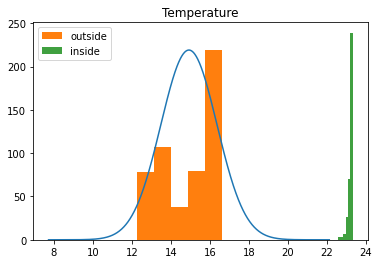

In [16]:
#Temperature (outside)

ndata = ou_data[d]  ##VAR
bns = 5  ##VAR

i = 0
xd = np.zeros(bns)
mx = ndata.max()
mn = ndata.min()
step = (ndata.max() - ndata.min())/bns

for i in range(bns):
    cstep = mn + (step * i)
    imask = (ndata >= cstep) & (ndata <= (cstep + step))
    idata = ndata[imask]
    xd[i] = len(idata)

mu = np.mean(ou_data[d])  ##VAR
sig = np.std(ou_data[d])  ##VAR
xdata = np.linspace(mu-5*sig,mu+5*sig,1000)

ln = xd.max()/gauss(xdata, mu, sig).max()

plt.title(d)  ##VAR
plt.plot(xdata,ln*gauss(xdata, mu, sig))
plt.hist(ou_data[d],bins=bns,label='outside')  ##VAR
plt.hist(in_data[d],bins=6,color="green",label='inside',alpha=0.75)
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

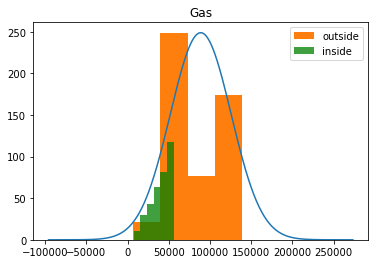

In [17]:
#Gas (outside)


ndata = ou_data[e]  ##VAR
bns = 4  ##VAR

i = 0
xd = np.zeros(bns)
mx = ndata.max()
mn = ndata.min()
step = (ndata.max() - ndata.min())/bns

for i in range(bns):
    cstep = mn + (step * i)
    imask = (ndata >= cstep) & (ndata <= (cstep + step))
    idata = ndata[imask]
    xd[i] = len(idata)

mu = np.mean(ou_data[e])  ##VAR
sig = np.std(ou_data[e])  ##VAR
xdata = np.linspace(mu-5*sig,mu+5*sig,1000)

ln = xd.max()/gauss(xdata, mu, sig).max()

plt.title(e)  ##VAR
plt.plot(xdata,ln*gauss(xdata, mu, sig))
plt.hist(ou_data[e],bins=bns,label='outside')  ##VAR
plt.hist(in_data[e],bins=6,color="green",label='inside',alpha=0.75)
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

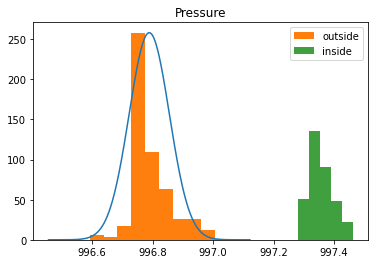

In [18]:
#Pressure (outside)


ndata = ou_data[f]  ##VAR
bns = 10  ##VAR

i = 0
xd = np.zeros(bns)
mx = ndata.max()
mn = ndata.min()
step = (ndata.max() - ndata.min())/bns

for i in range(bns):
    cstep = mn + (step * i)
    imask = (ndata >= cstep) & (ndata <= (cstep + step))
    idata = ndata[imask]
    xd[i] = len(idata)

mu = np.mean(ou_data[f])  ##VAR
sig = np.std(ou_data[f])  ##VAR
xdata = np.linspace(mu-5*sig,mu+5*sig,1000)

ln = xd.max()/gauss(xdata, mu, sig).max()

plt.title(f)  ##VAR
plt.plot(xdata,ln*gauss(xdata, mu, sig))
plt.hist(ou_data[f],bins=bns,label='outside')  ##VAR
plt.hist(in_data[f],bins=5,color="green",label='inside',alpha=0.75)
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

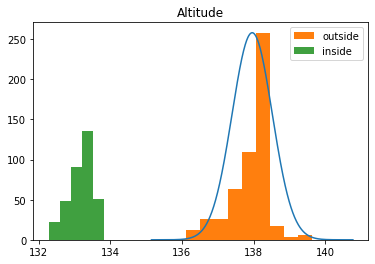

In [19]:
#Altitude (outside)


ndata = ou_data[g]  ##VAR
bns = 10  ##VAR

i = 0
xd = np.zeros(bns)
mx = ndata.max()
mn = ndata.min()
step = (ndata.max() - ndata.min())/bns

for i in range(bns):
    cstep = mn + (step * i)
    imask = (ndata >= cstep) & (ndata <= (cstep + step))
    idata = ndata[imask]
    xd[i] = len(idata)

mu = np.mean(ou_data[g])  ##VAR
sig = np.std(ou_data[g])  ##VAR
xdata = np.linspace(mu-5*sig,mu+5*sig,1000)

ln = xd.max()/gauss(xdata, mu, sig).max()

plt.title(g)  ##VAR
plt.plot(xdata,ln*gauss(xdata, mu, sig))
plt.hist(ou_data[g],bins=bns,label='outside')  ##VAR
plt.hist(in_data[g],bins=5,color="green",label='inside',alpha=0.75)
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

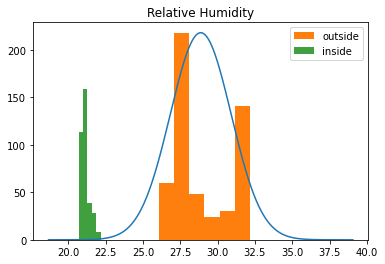

In [20]:
#Relative Humidity (outside)


ndata = ou_data[h]  ##VAR
bns = 6  ##VAR

i = 0
xd = np.zeros(bns)
mx = ndata.max()
mn = ndata.min()
step = (ndata.max() - ndata.min())/bns

for i in range(bns):
    cstep = mn + (step * i)
    imask = (ndata >= cstep) & (ndata <= (cstep + step))
    idata = ndata[imask]
    xd[i] = len(idata)

mu = np.mean(ou_data[h])  ##VAR
sig = np.std(ou_data[h])  ##VAR
xdata = np.linspace(mu-5*sig,mu+5*sig,1000)

ln = xd.max()/gauss(xdata, mu, sig).max()

plt.title(h)  ##VAR
plt.plot(xdata,ln*gauss(xdata, mu, sig))
plt.hist(ou_data[h],bins=bns,label='outside')  ##VAR
plt.hist(in_data[h],bins=5,color="green",label='inside',alpha=0.75)
plt.legend()
plt.show

In [160]:
##RESULTS OF COMPARISON##

# A number of sensor data sets mirrored eachother quite well. The air quality sensors (PM10, PM25, & PM100) all took the form of
# relatively neat gaussian distributions, and while the intensities and counts of the inside and outside data did differ, as
# expected, it's easy to see their very similar shape. Altitude and pressure both also show decen gaussian-like distribution,
# though they both have considerably higher than typical counts around their means. They also mirror eachothers shape perfectly,
# and are likely two sets of data from the same sensor.
# The sensor data sets that were most problematic were Temperature, Gas, and Relative Humidity. With the 'inside' data sets did
# not show gaussian distribution at all and indicated more of an approach to maximum/equilibrium. Their 'outside' data sets were
# incredibly unpredictable and messy, likely due to the high winds.

##BELOW is a comparison of the mean and std for the 'inside' and 'outside' data sets for each sensor

inmean = [np.mean(in_data[a]),np.mean(in_data[b]),np.mean(in_data[c]),np.mean(in_data[d]),np.mean(in_data[e]),np.mean(in_data[f]),np.mean(in_data[g]),np.mean(in_data[h])]
instd = [np.std(in_data[a]),np.std(in_data[b]),np.std(in_data[c]),np.std(in_data[d]),np.std(in_data[e]),np.std(in_data[f]),np.std(in_data[g]),np.std(in_data[h])]
oumean = [np.mean(ou_data[a]),np.mean(ou_data[b]),np.mean(ou_data[c]),np.mean(ou_data[d]),np.mean(ou_data[e]),np.mean(ou_data[f]),np.mean(ou_data[g]),np.mean(ou_data[h])]
oustd = [np.std(ou_data[a]),np.std(ou_data[b]),np.std(ou_data[c]),np.std(ou_data[d]),np.std(ou_data[e]),np.std(ou_data[f]),np.std(ou_data[g]),np.std(ou_data[h])]
diffinnout = abs(np.subtract(inmean,oumean))
insidemeandiff= np.divide(diffinnout,instd)
inmeanunc = np.divide(inmean,math.sqrt(len(in_data[a])))
                      
comparison = {'Sensor:':['PM10','PM25','PM100','Temperature','Gas','Pressure','Altitude','Rel. Humidty'],
             'IN mean':[inmean[0],inmean[1],inmean[2],inmean[3],inmean[4],inmean[5],inmean[6],inmean[7]],
             'OUT mean':[oumean[0],oumean[1],oumean[2],oumean[3],oumean[4],oumean[5],oumean[6],oumean[7]],
             'IN std':[instd[0],instd[1],instd[2],instd[3],instd[4],instd[5],instd[6],instd[7]],
             'OUT std':[oustd[0],oustd[1],oustd[2],oustd[3],oustd[4],oustd[5],oustd[6],oustd[7]],
             'Diff in Inside and Outside':diffinnout,
             'Inside Std between Outside and Inside': insidemeandiff,
             'Mean Uncertainity':inmeanunc}

comp = pd.DataFrame(comparison)
display(comp)

,Sensor:,IN mean,OUT mean,IN std,OUT std,Diff in Inside and Outside,Inside Std between Outside and Inside,Mean Uncertainity
0,PM10,0.971264,0.414587,0.484568,0.504203,0.556677,1.148810,0.052065
1,PM25,2.068966,1.222649,0.806484,0.800879,0.846317,1.049391,0.110908
2,PM100,2.103448,1.589251,0.823986,0.981694,0.514197,0.624036,0.112757
3,Temperature,23.216500,14.925133,0.117833,1.438426,8.291367,70.365425,1.244535
4,Gas,40087.747126,88725.808061,11735.452125,36955.897158,48638.060935,4.144541,2148.928809
5,Pressure,997.356080,996.788693,0.040221,0.066667,0.567387,14.106598,53.463898
6,Altitude,133.176143,137.962004,0.339182,0.562446,4.785861,14.110013,7.138991
7,Rel. Humidty,21.149127,28.867888,0.282405,2.039351,7.718762,27.332239,1.133712


central limit theorem suggests 30-50 randomly sampled readings and we took 348 so we did take enough readings.

### Step 5: Comparing sensors
- Get data from another group in your lab and compare your inside data with their inside data, including all of elements from Step 4. Do the same comparing your outside data with their outside data.
- How do the sensors compare? What do you think this indicates about the accuracy and precision of your sensors?

In [56]:
in_dataG = pd.read_csv('feb172023insidedata.csv')
display(in_dataG)

q = 'Concentration Units (Standard) PM 1.0'
j = 'Concentration Units (Standard) PM 2.5'
k = 'Concentration Units (Standard) PM 10.0'
l = 'temperature'
m = 'gas'
n = 'pressure'
o = 'humidity'
p = 'altitude'

ibins = [3,5,5,12,10,10,10,12]

def gauss(x, m, s):
    return 1/(math.sqrt(2.*math.pi*s**2))*math.e**((-1*(x-m)**2)/(2. * s**2))

,time,Concentration Units (Standard) PM 1.0,Concentration Units (Standard) PM 2.5,Concentration Units (Standard) PM 10.0,temperature,gas,pressure,humidity,altitude,Unnamed: 9
0,1676677883,0,2,2,22.190742,40266,1006.418695,16.964390,57.031162,NaN
1,1676677885,0,2,2,22.209102,8369,1006.418684,16.945647,57.031248,NaN
2,1676677886,0,2,2,22.248750,12720,1006.425273,16.927980,56.976090,NaN
3,1676677887,1,2,2,22.287617,15648,1006.435674,16.870944,56.889022,NaN
4,1676677888,1,2,2,22.322383,17699,1006.444328,16.813722,56.816573,NaN
...,...,...,...,...,...,...,...,...,...,...
295,1676678235,0,0,0,22.772188,65364,1006.448528,15.900696,56.781415,NaN
296,1676678236,1,1,1,22.772969,65415,1006.444706,15.910491,56.813414,NaN
297,1676678237,0,1,1,22.771992,65262,1006.448202,15.900687,56.784151,NaN
298,1676678239,0,1,1,22.772188,65313,1006.450238,15.900696,56.767100,NaN


0      0
1      0
2      0
3      1
4      1
      ..
295    0
296    1
297    0
298    0
299    0
Name: Concentration Units (Standard) PM 1.0, Length: 300, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

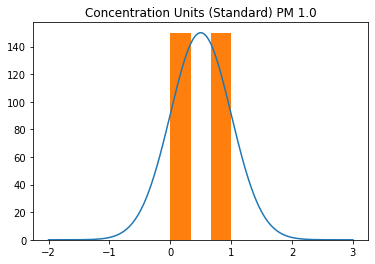

In [66]:
#PM10 std

ndata = in_dataG[q] ##VAR
bns = 3  ##VAR

print(ndata)

i = 0
xd = np.zeros(bns)
mx = ndata.max()
mn = ndata.min()
step = (ndata.max() - ndata.min())/bns

for i in range(bns):
    cstep = mn + (step * i)
    imask = (ndata >= cstep) & (ndata <= (cstep + step))
    idata = ndata[imask]
    xd[i] = len(idata)

mu = np.mean(in_dataG[q])  ##VAR
sig = np.std(in_dataG[q])  ##VAR
xdata = np.linspace(mu-5*sig,mu+5*sig,1000)

ln = xd.max()/gauss(xdata, mu, sig).max()

plt.title(q)  ##VAR
plt.plot(xdata,ln*gauss(xdata, mu, sig))
plt.hist(in_dataG[q],bins=bns)  ##VAR
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

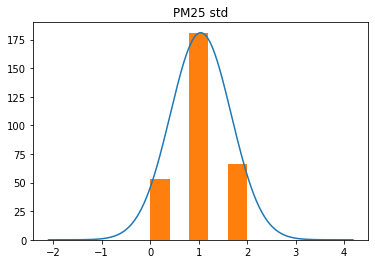

In [67]:
#PM25 std

ndata = in_dataG[j]  ##VAR
bns = 5  ##VAR

i = 0
xd = np.zeros(bns)
mx = ndata.max()
mn = ndata.min()
step = (ndata.max() - ndata.min())/bns

for i in range(bns):
    cstep = mn + (step * i)
    imask = (ndata >= cstep) & (ndata <= (cstep + step))
    idata = ndata[imask]
    xd[i] = len(idata)

mu = np.mean(in_dataG[j])  ##VAR
sig = np.std(in_dataG[j])  ##VAR
xdata = np.linspace(mu-5*sig,mu+5*sig,1000)

ln = xd.max()/gauss(xdata, mu, sig).max()

plt.title(b)  ##VAR
plt.plot(xdata,ln*gauss(xdata, mu, sig))
plt.hist(in_dataG[j],bins=bns)  ##VAR
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

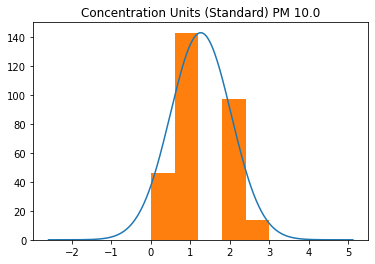

In [68]:
#PM100 std

ndata = in_dataG[k]  ##VAR
bns = 5  ##VAR

i = 0
xd = np.zeros(bns)
mx = ndata.max()
mn = ndata.min()
step = (ndata.max() - ndata.min())/bns

for i in range(bns):
    cstep = mn + (step * i)
    imask = (ndata >= cstep) & (ndata <= (cstep + step))
    idata = ndata[imask]
    xd[i] = len(idata)

mu = np.mean(in_dataG[k])  ##VAR
sig = np.std(in_dataG[k])  ##VAR
xdata = np.linspace(mu-5*sig,mu+5*sig,1000)

ln = xd.max()/gauss(xdata, mu, sig).max()

plt.title(k)  ##VAR
plt.plot(xdata,ln*gauss(xdata, mu, sig))
plt.hist(in_dataG[k],bins=bns)  ##VAR
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

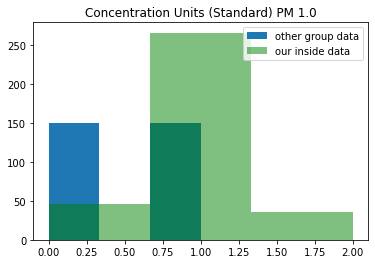

In [91]:
#PM10 (our inside vs other group inside)

ndata = in_dataG[q]  ##VAR
bns = 3  ##VAR

i = 0
xd = np.zeros(bns)
mx = ndata.max()
mn = ndata.min()
step = (ndata.max() - ndata.min())/bns

for i in range(bns):
    cstep = mn + (step * i)
    imask = (ndata >= cstep) & (ndata <= (cstep + step))
    idata = ndata[imask]
    xd[i] = len(idata)

mu = np.mean(in_dataG[q])  ##VAR
sig = np.std(in_dataG[q])  ##VAR
xdata = np.linspace(mu-5*sig,mu+5*sig,1000)

ln = xd.max()/gauss(xdata, mu, sig).max()

plt.title(q)  ##VAR
plt.hist(in_dataG[q],bins=bns,label='other group data')  ##VAR
plt.hist(in_data[a],bins=ibins[0],color="green",label='our inside data',alpha=0.5)
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

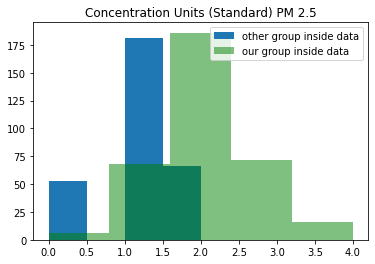

In [89]:
ndata = in_dataG[j]  ##VAR
bns = 4  ##VAR

i = 0
xd = np.zeros(bns)
mx = ndata.max()
mn = ndata.min()
step = (ndata.max() - ndata.min())/bns

for i in range(bns):
    cstep = mn + (step * i)
    imask = (ndata >= cstep) & (ndata <= (cstep + step))
    idata = ndata[imask]
    xd[i] = len(idata)

mu = np.mean(in_dataG[j])  ##VAR
sig = np.std(in_dataG[j])  ##VAR
xdata = np.linspace(mu-5*sig,mu+5*sig,1000)

ln = xd.max()/gauss(xdata, mu, sig).max()

plt.title(j)  ##VAR
plt.hist(in_dataG[j],bins=bns,label='other group inside data')  ##VAR
plt.hist(in_data[b],bins=ibins[1],color="green",label='our group inside data',alpha=0.5)
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

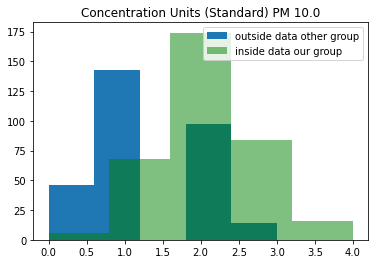

In [92]:
#PM100 (outside)

ndata = in_dataG[k]  ##VAR
bns = 5  ##VAR

i = 0
xd = np.zeros(bns)
mx = ndata.max()
mn = ndata.min()
step = (ndata.max() - ndata.min())/bns

for i in range(bns):
    cstep = mn + (step * i)
    imask = (ndata >= cstep) & (ndata <= (cstep + step))
    idata = ndata[imask]
    xd[i] = len(idata)

mu = np.mean(in_dataG[k])  ##VAR
sig = np.std(in_dataG[k])  ##VAR
xdata = np.linspace(mu-5*sig,mu+5*sig,1000)

ln = xd.max()/gauss(xdata, mu, sig).max()

plt.title(k)  ##VAR
plt.hist(in_dataG[k],bins=bns,label='outside data other group')  ##VAR
plt.hist(in_data[c],bins=ibins[2],color="green",label='inside data our group',alpha=0.5)
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

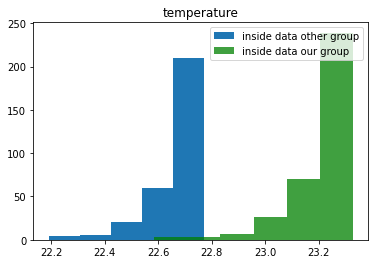

In [93]:
#Temperature (outside)

ndata = in_dataG[l]  ##VAR
bns = 5  ##VAR

i = 0
xd = np.zeros(bns)
mx = ndata.max()
mn = ndata.min()
step = (ndata.max() - ndata.min())/bns

for i in range(bns):
    cstep = mn + (step * i)
    imask = (ndata >= cstep) & (ndata <= (cstep + step))
    idata = ndata[imask]
    xd[i] = len(idata)

mu = np.mean(in_dataG[l])  ##VAR
sig = np.std(in_dataG[l])  ##VAR
xdata = np.linspace(mu-5*sig,mu+5*sig,1000)

ln = xd.max()/gauss(xdata, mu, sig).max()

plt.title(l)  ##VAR
plt.hist(in_dataG[l],bins=bns,label='inside data other group')  ##VAR
plt.hist(in_data[d],bins=6,color="green",label='inside data our group',alpha=0.75)
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

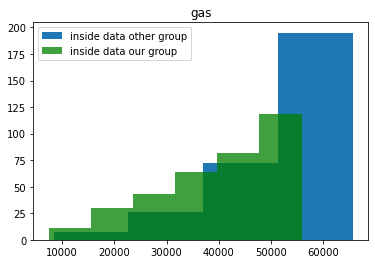

In [95]:
#Gas (outside)


ndata = in_dataG[m]  ##VAR
bns = 4  ##VAR

i = 0
xd = np.zeros(bns)
mx = ndata.max()
mn = ndata.min()
step = (ndata.max() - ndata.min())/bns

for i in range(bns):
    cstep = mn + (step * i)
    imask = (ndata >= cstep) & (ndata <= (cstep + step))
    idata = ndata[imask]
    xd[i] = len(idata)

mu = np.mean(in_dataG[m])  ##VAR
sig = np.std(in_dataG[m])  ##VAR
xdata = np.linspace(mu-5*sig,mu+5*sig,1000)

ln = xd.max()/gauss(xdata, mu, sig).max()

plt.title(m)  ##VAR
plt.hist(in_dataG[m],bins=bns,label='inside data other group')  ##VAR
plt.hist(in_data[e],bins=6,color="green",label='inside data our group',alpha=0.75)
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

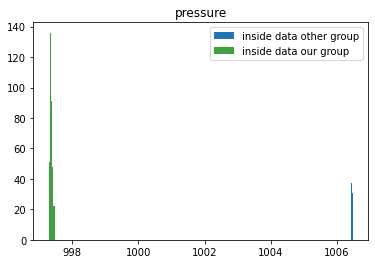

In [96]:
#Pressure (outside)


ndata = in_dataG[n]  ##VAR
bns = 10  ##VAR

i = 0
xd = np.zeros(bns)
mx = ndata.max()
mn = ndata.min()
step = (ndata.max() - ndata.min())/bns

for i in range(bns):
    cstep = mn + (step * i)
    imask = (ndata >= cstep) & (ndata <= (cstep + step))
    idata = ndata[imask]
    xd[i] = len(idata)

plt.title(n)  ##VAR
plt.hist(in_dataG[n],bins=bns,label='inside data other group')  ##VAR
plt.hist(in_data[f],bins=5,color="green",label='inside data our group',alpha=0.75)
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

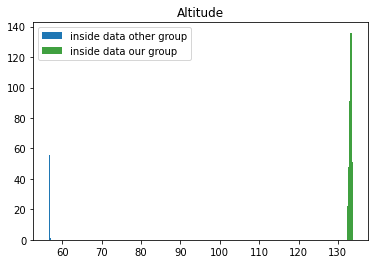

In [171]:
#Altitude (outside)


ndata = in_dataG[p]  ##VAR
bns = 12  ##VAR

i = 0
xd = np.zeros(bns)
mx = ndata.max()
mn = ndata.min()
step = (ndata.max() - ndata.min())/bns

for i in range(bns):
    cstep = mn + (step * i)
    imask = (ndata >= cstep) & (ndata <= (cstep + step))
    idata = ndata[imask]
    xd[i] = len(idata)


plt.title(g)  ##VAR
plt.hist(in_dataG[p],bins=bns,label='inside data other group')  ##VAR
plt.hist(in_data[g],bins=5,color="green",label='inside data our group',alpha=0.75)
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

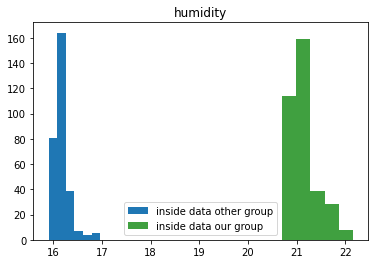

In [167]:
#Relative Humidity (outside)


ndata = in_dataG[o]  ##VAR
bns = 6  ##VAR

i = 0
xd = np.zeros(bns)
mx = ndata.max()
mn = ndata.min()
step = (ndata.max() - ndata.min())/bns

for i in range(bns):
    cstep = mn + (step * i)
    imask = (ndata >= cstep) & (ndata <= (cstep + step))
    idata = ndata[imask]
    xd[i] = len(idata)


plt.title(o)  ##VAR
plt.hist(in_dataG[o],bins=bns,label='inside data other group')  ##VAR
plt.hist(in_data[h],bins=5,color="green",label='inside data our group',alpha=0.75)
plt.legend()
plt.show

In [112]:
ou_dataG = pd.read_csv('feb242023outsidedata.csv')
display(in_dataG)

,time,Concentration Units (Standard) PM 1.0,Concentration Units (Standard) PM 2.5,Concentration Units (Standard) PM 10.0,temperature,gas,pressure,humidity,altitude,Unnamed: 9
0,1676677883,0,2,2,22.190742,40266,1006.418695,16.964390,57.031162,NaN
1,1676677885,0,2,2,22.209102,8369,1006.418684,16.945647,57.031248,NaN
2,1676677886,0,2,2,22.248750,12720,1006.425273,16.927980,56.976090,NaN
3,1676677887,1,2,2,22.287617,15648,1006.435674,16.870944,56.889022,NaN
4,1676677888,1,2,2,22.322383,17699,1006.444328,16.813722,56.816573,NaN
...,...,...,...,...,...,...,...,...,...,...
295,1676678235,0,0,0,22.772188,65364,1006.448528,15.900696,56.781415,NaN
296,1676678236,1,1,1,22.772969,65415,1006.444706,15.910491,56.813414,NaN
297,1676678237,0,1,1,22.771992,65262,1006.448202,15.900687,56.784151,NaN
298,1676678239,0,1,1,22.772188,65313,1006.450238,15.900696,56.767100,NaN


<function matplotlib.pyplot.show(close=None, block=None)>

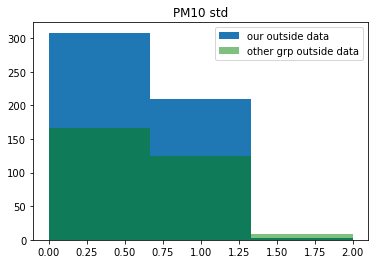

In [157]:
#PM10 (outside vs inside)

ndata = ou_data[a]  ##VAR
bns = 3  ##VAR

i = 0
xd = np.zeros(bns)
mx = ndata.max()
mn = ndata.min()
step = (ndata.max() - ndata.min())/bns

for i in range(bns):
    cstep = mn + (step * i)
    imask = (ndata >= cstep) & (ndata <= (cstep + step))
    idata = ndata[imask]
    xd[i] = len(idata)


plt.title(a)  ##VAR
plt.hist(ou_data[a],bins=bns,label='our outside data')  ##VAR
plt.hist(ou_dataG[q],bins=ibins[-8],color="green",label='other grp outside data',alpha=0.5)
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

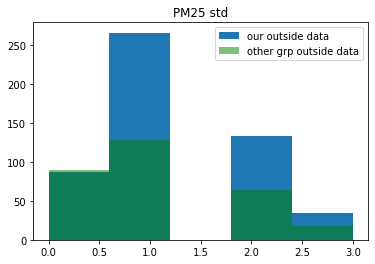

In [156]:
#PM10 (outside vs inside)

ndata = ou_data[b]  ##VAR
bns = 5  ##VAR

i = 0
xd = np.zeros(bns)
mx = ndata.max()
mn = ndata.min()
step = (ndata.max() - ndata.min())/bns

for i in range(bns):
    cstep = mn + (step * i)
    imask = (ndata >= cstep) & (ndata <= (cstep + step))
    idata = ndata[imask]
    xd[i] = len(idata)


plt.title(b)  ##VAR
plt.hist(ou_data[b],bins=bns,label='our outside data')  ##VAR
plt.hist(ou_dataG[j],bins=ibins[-7],color="green",label='other grp outside data',alpha=0.5)
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

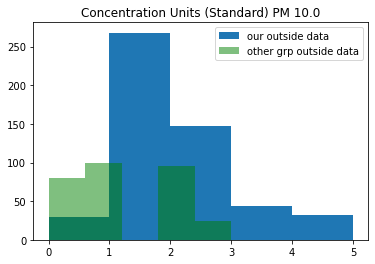

In [155]:
#PM10 (outside vs inside)

ndata = ou_data[c]  ##VAR
bns = 5  ##VAR

i = 0
xd = np.zeros(bns)
mx = ndata.max()
mn = ndata.min()
step = (ndata.max() - ndata.min())/bns

for i in range(bns):
    cstep = mn + (step * i)
    imask = (ndata >= cstep) & (ndata <= (cstep + step))
    idata = ndata[imask]
    xd[i] = len(idata)


plt.title(k)  ##VAR
plt.hist(ou_data[c],bins=bns,label='our outside data')  ##VAR
plt.hist(ou_dataG[k],bins=ibins[-6],color="green",label='other grp outside data',alpha=0.5)
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

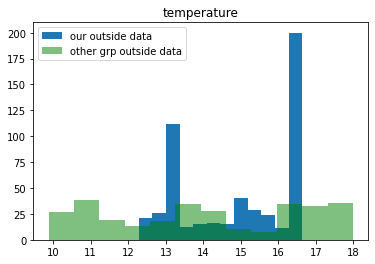

In [154]:
#PM10 (outside vs inside)

ndata = ou_data[d]  ##VAR
bns = 12  ##VAR

i = 0
xd = np.zeros(bns)
mx = ndata.max()
mn = ndata.min()
step = (ndata.max() - ndata.min())/bns

for i in range(bns):
    cstep = mn + (step * i)
    imask = (ndata >= cstep) & (ndata <= (cstep + step))
    idata = ndata[imask]
    xd[i] = len(idata)


plt.title(l)  ##VAR
plt.hist(ou_data[d],bins=bns,label='our outside data')  ##VAR
plt.hist(ou_dataG[l],bins=ibins[-5],color="green",label='other grp outside data',alpha=0.5)
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

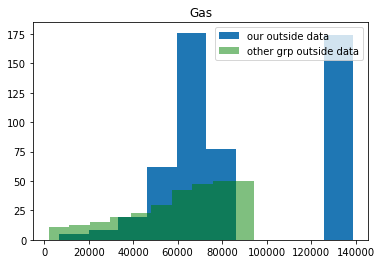

In [153]:
#PM10 (outside vs inside)

ndata = ou_data[e]  ##VAR
bns = 10  ##VAR

i = 0
xd = np.zeros(bns)
mx = ndata.max()
mn = ndata.min()
step = (ndata.max() - ndata.min())/bns

for i in range(bns):
    cstep = mn + (step * i)
    imask = (ndata >= cstep) & (ndata <= (cstep + step))
    idata = ndata[imask]
    xd[i] = len(idata)


plt.title(e)  ##VAR
plt.hist(ou_data[e],bins=bns,label='our outside data')  ##VAR
plt.hist(ou_dataG[m],bins=ibins[-4],color="green",label='other grp outside data',alpha=0.5)
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

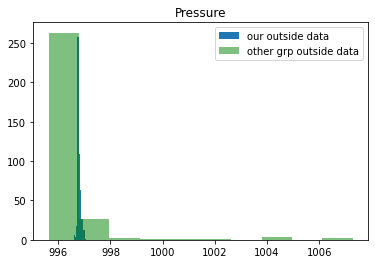

In [152]:
#PM10 (outside vs inside)

ndata = ou_data[f]  ##VAR
bns = 10  ##VAR

i = 0
xd = np.zeros(bns)
mx = ndata.max()
mn = ndata.min()
step = (ndata.max() - ndata.min())/bns

for i in range(bns):
    cstep = mn + (step * i)
    imask = (ndata >= cstep) & (ndata <= (cstep + step))
    idata = ndata[imask]
    xd[i] = len(idata)


plt.title(f)  ##VAR
plt.hist(ou_data[f],bins=bns,label='our outside data')  ##VAR
plt.hist(ou_dataG[n],bins=ibins[-3],color="green",label='other grp outside data',alpha=0.5)
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

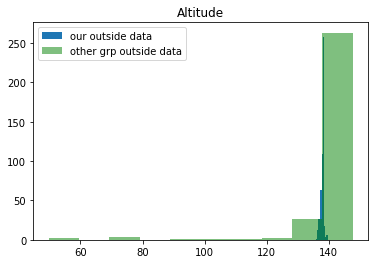

In [151]:
#PM10 (outside vs inside)

ndata = ou_data[g]  ##VAR
bns = 10  ##VAR

i = 0
xd = np.zeros(bns)
mx = ndata.max()
mn = ndata.min()
step = (ndata.max() - ndata.min())/bns

for i in range(bns):
    cstep = mn + (step * i)
    imask = (ndata >= cstep) & (ndata <= (cstep + step))
    idata = ndata[imask]
    xd[i] = len(idata)


plt.title(g)  ##VAR
plt.hist(ou_data[g],bins=bns,label='our outside data')  ##VAR
plt.hist(ou_dataG[p],bins=ibins[-2],color="green",label='other grp outside data',alpha=0.5)
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

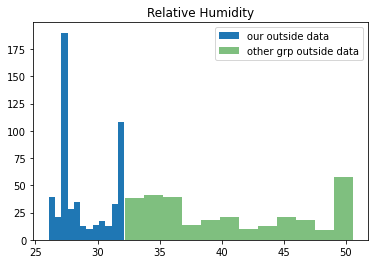

In [150]:
#PM10 (outside vs inside)

ndata = ou_data[h]  ##VAR
bns = 12  ##VAR

i = 0
xd = np.zeros(bns)
mx = ndata.max()
mn = ndata.min()
step = (ndata.max() - ndata.min())/bns

for i in range(bns):
    cstep = mn + (step * i)
    imask = (ndata >= cstep) & (ndata <= (cstep + step))
    idata = ndata[imask]
    xd[i] = len(idata)


plt.title(h)  ##VAR
plt.hist(ou_data[h],bins=bns,label='our outside data')  ##VAR
plt.hist(ou_dataG[o],bins=ibins[-1],color="green",label='other grp outside data',alpha=0.5)
plt.legend()
plt.show

In [175]:
inmean = [np.mean(in_dataG[q]),np.mean(in_dataG[j]),np.mean(in_dataG[k]),np.mean(in_dataG[l]),np.mean(in_dataG[m]),np.mean(in_dataG[n]),np.mean(in_dataG[p]),np.mean(in_dataG[o])]
instd = [np.std(in_dataG[q]),np.std(in_dataG[j]),np.std(in_dataG[k]),np.std(in_dataG[l]),np.std(in_dataG[m]),np.std(in_dataG[n]),np.std(in_dataG[p]),np.std(in_dataG[o])]
oumean = [np.mean(ou_dataG[q]),np.mean(ou_dataG[j]),np.mean(ou_dataG[k]),np.mean(ou_dataG[l]),np.mean(ou_dataG[m]),np.mean(ou_dataG[n]),np.mean(ou_dataG[p]),np.mean(ou_dataG[o])]
oustd = [np.std(ou_dataG[q]),np.std(ou_dataG[j]),np.std(ou_dataG[k]),np.std(ou_dataG[l]),np.std(ou_dataG[m]),np.std(ou_dataG[n]),np.std(ou_dataG[p]),np.std(ou_dataG[o])]
diffinnout = abs(np.subtract(inmean,oumean))
insidemeandiff= np.divide(diffinnout,instd)
inmeanunc = np.divide(inmean,math.sqrt(len(in_dataG[q])))
                      
comparison = {'Sensor:':['PM10','PM25','PM100','Temperature','Gas','Pressure','Altitude','Rel. Humidty'],
             'IN mean':[inmean[0],inmean[1],inmean[2],inmean[3],inmean[4],inmean[5],inmean[6],inmean[7]],
             'OUT mean':[oumean[0],oumean[1],oumean[2],oumean[3],oumean[4],oumean[5],oumean[6],oumean[7]],
             'IN std':[instd[0],instd[1],instd[2],instd[3],instd[4],instd[5],instd[6],instd[7]],
             'OUT std':[oustd[0],oustd[1],oustd[2],oustd[3],oustd[4],oustd[5],oustd[6],oustd[7]],
             'Diff in Inside and Outside':diffinnout,
             'Inside Std between Outside and Inside': insidemeandiff,
             'Mean Uncertainity':inmeanunc}

other_grpdata_comp = pd.DataFrame(comparison)
display(other_grpdata_comp)

,Sensor:,IN mean,OUT mean,IN std,OUT std,Diff in Inside and Outside,Inside Std between Outside and Inside,Mean Uncertainity
0,PM10,0.500000,0.470000,0.500000,0.549939,0.030000,0.060000,0.028868
1,PM25,1.043333,1.033333,0.628322,0.867307,0.010000,0.015915,0.060237
2,PM100,1.263333,1.213333,0.770707,0.927985,0.050000,0.064876,0.072939
3,Temperature,22.680598,14.089473,0.104018,2.513948,8.591125,82.592503,1.309465
4,Gas,52721.303333,61386.216667,11416.647129,23585.114853,8664.913333,0.758972,3043.865867
5,Pressure,1006.457452,996.647999,0.011947,1.308994,9.809452,821.111705,58.107848
6,Altitude,56.706717,139.154911,0.100006,11.010364,82.448194,824.429404,3.273964
7,Rel. Humidty,16.162533,40.872861,0.172770,6.166178,24.710329,143.024574,0.933144


for every reading the mean uncertainity of the other group is lower suggesting more precise results.
we cannot comment on the accuracy of the data we have collected as both show different readings.

### Extra: Correlations in data
- Plot temperature vs humidity
  - NOTE: These were taken by the same sensor at the same time, so each measurement matches up in time, meaning plotting one versus the other works. 
  - What is the hidden variable that is important when making plots like this?
- What does this plot show? Are temperature and humidity correlated? How might you quantify this?

- Plot temperature vs another property measured by that sensor, are they correlated? Is the correlation qualitatively similar to what you see from temperature vs humidity?
  - try this for all data types (temp. vs pressure, temp. vs voc, etc.)
  
- Plot temperature vs PM2.5 concentration and discuss as with the previous comparisons.